<h1> Projeto 2 de Ciências de Dados </h1>

<h2> Grupo 20 </h2>
    <br>
    <h4> Integrantes: 
    <br>
    <br>
    <ul>
    <li> Venâncio Freitas </li>
    <br>
    <li> Welington Rodrigues </li>
    <br>
    <li> Henrique Puppi </li>
    <br>
    <li> Gabriel Fonseca </li>
    <br>
    </ul>
    </h4>

## 1. Visão Geral do Projeto 

### Objetivo 

 <p> O Trabalho em questão, envolverá a análise de uma base de dados na qual temos dados sociais sobre pessoas em situação de rua, a partir disso, iremos traçar o perfil envolvendo determinada situação de um desabrigado.</p>

### Motivações 

<p> Devido à crise global recente, motivada pela pandemia, o governo e a sociedade brasileira, passaram por dificuldades de manutenção da ordem nacional, principalmente em relação ao que tange o perfil socioeconômico. Assim, mostra-se relevante a análise do panorama desses moradores, para entender a situação de tais, como já citado. </p>

### Base de Dados 

<p> A base de dados que será analisada, trata-se de um Censo Realizado pela prefeitura de São Paulo no Ano de 2021, como já mencionado, e seu acesso é possível a partir do seguinte link: <a href='https://www.prefeitura.sp.gov.br/cidade/secretarias/assistencia_social/censo_2021/index.php?p=2007'> Censo 2021</a>
    
<h3> As features da base de dados são as seguintes: </h3>
<br>
<br>
<li> Situação de rua : Estado da Pessoa em relação à situação </li>
<li> Onde dormiu ontem: Local onde a pessoa dormiu no dia anterior ao dia de pesquisa </li> 
<li> Tempo de Permanencia: Tempo em que a pessoa passou nas ruas </li>
<li> Sexo: Sexo de nascença da pessoa </li> 
<li> Se identifica com o sexo de nascença:  Sexo ao qual a pessoa se identifica</li>
<li> Idade: Número da idade da pessoa </li> 
<li> Faixa de idade: Intervalo de 10 anos da idade da pessoa </li> 
<li> Classificação de idade: Classificação de idade da pessoa </li> 
<li> Cor_Raça_Etnia: Cor, raça, ou Etnia da pessoa </li> 
<li> Parentes no CA: Se a pessoa tem parentes em Centros de Acolhimento </li>
<li> Tempo na Situação: Tempo ao qual a pessoa encontra-se na situação ao qual ela está </li> 
<li> Tipo de Ponto: Tipo de local na rua ao qual ela encontra-se </li> 
<li> Presença_Moradia_Improvisada : Indica se a pessoa tem ou não moradia improvisada na sua situação </li> 
<li> Criança_acomp_adulto: Se tem criança acompanho de adulto entre o grupo consultado </li> 
<li> Criança_sozinha: Se tem uma criança sozinha na entrevista </li> 
<li> Latitude: Latitude da localidade ao qual a pessoa foi entrevistada </li> 
<li> Longitude: Longitude da pessoa entrevistada </li> 
<li> Data: Data ao qual foi feita a pesquisa </li> 
<li> Subprefeitura: Subprefeitura da cidade de São Paulo onde foi feita a entrevista </li> 
<li> Distrito: Divisão Administrativa do Município de São Paulo </li>

<br>
<br>

### Target 

O Target de Análise será a coluna 'Situação de rua', a qual, a partir das análises feitas pelo grupo, será feita a predicao de perfil, para definir se a pessoa está na Rua ou em Centros de Acolhimentos.

In [205]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1. Limpeza da Base de Dados

#### Lendo a base de dados  e removendo a coluna ID

In [206]:
df = pd.read_excel('dados.xlsx')
df = pd.DataFrame(df)

# Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
df = df.drop('ID', axis=1)
df

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


<h4> No target 'Onde dormiu ontem' iremos trocar a variável 'Neste centro de acolhida (aqui)' por 'CA' para facilitar a análise da base de dados. </h4>

In [207]:
df['Onde dormiu ontem'] = df['Onde dormiu ontem'].apply(lambda x: 'CA' if x == 'Neste centro de acolhida (aqui)' else x)
df

,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31879,Acolhido,CA,Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,Sim,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31880,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,Sim,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31882,Acolhido,CA,Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,Sim,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


<h4> Lendo os Tipos de Variáveis e transformando as variáveis qualitativas em Categóricas </h4>

In [208]:
df.dtypes

Situação de rua                         object
Onde dormiu ontem                       object
Tempo de permanência                    object
Sexo                                    object
Identifica com o sexo nasceu            object
Idade                                   object
Faixa de idade                          object
Classificação de idade                  object
Cor_Raça_Etnia                          object
Parentes no CA                          object
Tempo na situação                       object
Tipo de ponto                           object
Presença_Moradia_Improvisada            object
Criança_acomp_Adulto                    object
Criança_Sozinha                         object
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                           object
Distrito                                object
dtype: object

In [209]:
convert_dict = {'Situação de rua': 'category',
                'Onde dormiu ontem': 'category',
                'Tempo de permanência': 'category',
                'Sexo': 'category',
                'Identifica com o sexo nasceu': 'category',
                'Idade': 'category',
                'Faixa de idade': 'category',
                'Classificação de idade': 'category',
                'Cor_Raça_Etnia':'category',                          
                'Parentes no CA': 'category',                       
                'Tempo na situação': 'category',                   
                'Tipo de ponto': 'category',                        
                'Presença_Moradia_Improvisada': 'category',         
                'Criança_acomp_Adulto': 'category',                  
                'Criança_Sozinha': 'category',                      
                'Latitude': float,                           
                'Longitude': float,                             
                'Data': 'datetime64[ns]',                      
                'Subprefeitura': 'category',                          
                'Distrito': 'category'}

df = df.astype(convert_dict)
print(df.dtypes)

Situação de rua                       category
Onde dormiu ontem                     category
Tempo de permanência                  category
Sexo                                  category
Identifica com o sexo nasceu          category
Idade                                 category
Faixa de idade                        category
Classificação de idade                category
Cor_Raça_Etnia                        category
Parentes no CA                        category
Tempo na situação                     category
Tipo de ponto                         category
Presença_Moradia_Improvisada          category
Criança_acomp_Adulto                  category
Criança_Sozinha                       category
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                         category
Distrito                              category
dtype: object


#### Transformando a Faixa de idade e a Classificação de Idade em variáveis qualitativas ordinais 

In [210]:
ordem_faixa = ['Até 11', '12 a 17', '18 a 30', '31 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99', 'Sem informação']
ordem_classificacao = ['Criança', 'Adolescente', 'Juventude', 'Adulto', 'Idoso', 'Sem classificação']


df['Faixa de idade'] = pd.Categorical(df['Faixa de idade'], categories=ordem_faixa, ordered=True)
df['Classificação de idade'] = pd.Categorical(df['Classificação de idade'], categories=ordem_classificacao, ordered=True)

### 2. Análise Exploratória

<p> Nesse momento do projeto, torna-se essencial estudar as variáveis e selecionar quais variáveis mais se relacionam com a variável target  'Situação de Rua'definida pelo grupo </p>

### 2.1 Fazendo a Análise baseado nas variáveis referentes à idade 

In [211]:
#Identificação dos valores mais presentes no Dataframe Total 
df['Faixa de idade'].value_counts(sort = False , normalize=True ).to_frame()

,Faixa de idade
Até 11,0.011761
12 a 17,0.009440
18 a 30,0.128152
31 a 49,0.341896
50 a 59,0.117426
60 a 69,0.065989
70 a 79,0.014427
80 a 89,0.003074
90 a 99,0.000314
Sem informação,0.307521


In [212]:
#Como observa-se a Grande quantidade de Pessoas sem informação, e esses dados não são conclusivos, foi estabelecido um filtro 
#para monitoramos as faixas de idade as quais temos conhecimento no Dataframe.

In [213]:
filtro_info = df['Faixa de idade'] != 'Sem informação'
dados_idade_c_info = df.loc[filtro_info , :]
dados_idade_c_info['Faixa de idade'].value_counts(sort = False , normalize=True ).to_frame()

,Faixa de idade
Até 11,0.016984
12 a 17,0.013633
18 a 30,0.185063
31 a 49,0.493727
50 a 59,0.169573
60 a 69,0.095294
70 a 79,0.020834
80 a 89,0.004439
90 a 99,0.000453
Sem informação,0.000000


In [214]:
#Nesse momento, vamos utilizar a ferramenta do crosstab, para, a partir das faixas de idade conhecidas, obsevarmos as relações 
#com o target de interesse 

#### Análise do Crosstab com o Dataframe sem filtros 

In [215]:
#Corsstab Relativos em relação ao total 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize=True  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação,All
Situação de rua,,,,,,,,,,,
Acolhido,1.082047,0.323046,4.870782,15.076527,6.141011,4.538326,1.041275,0.247773,0.031364,6.401330,39.753481
Rua,0.094091,0.621001,7.944424,19.113035,5.601556,2.060595,0.401455,0.059591,0.000000,24.350772,60.246519
All,1.176139,0.944047,12.815205,34.189562,11.742567,6.598921,1.442730,0.307364,0.031364,30.752101,100.000000


In [216]:
#Porcentagem em relação às colunas 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize='columns'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação,All
Situação de rua,,,,,,,,,,,
Acolhido,92.0,34.219269,38.007832,44.096872,52.297009,68.773764,72.173913,80.612245,100.0,20.81591,39.753481
Rua,8.0,65.780731,61.992168,55.903128,47.702991,31.226236,27.826087,19.387755,0.0,79.18409,60.246519


In [217]:
#Porcentagens em Relação às linhas 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize='index'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação
Situação de rua,,,,,,,,,,
Acolhido,2.721893,0.812623,12.252465,37.925049,15.447732,11.416174,2.619329,0.623274,0.078895,16.102564
Rua,0.156177,1.030767,13.186527,31.724712,9.297725,3.420272,0.666354,0.098912,0.000000,40.418554
All,1.176139,0.944047,12.815205,34.189562,11.742567,6.598921,1.442730,0.307364,0.031364,30.752101


#### Análise do Crosstab com o Dataframe com filtros de idade  

In [218]:
#Dados com Porcentagens totais 
pd.crosstab(dados_idade_c_info['Situação de rua'], dados_idade_c_info['Faixa de idade'], normalize=True  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,All
Situação de rua,,,,,,,,,,
Acolhido,1.562571,0.466507,7.033833,21.771819,8.868155,6.553739,1.503691,0.357806,0.045292,48.163413
Rua,0.135876,0.896780,11.472440,27.600888,8.089134,2.975678,0.579736,0.086055,0.000000,51.836587
All,1.698446,1.363286,18.506273,49.372707,16.957290,9.529417,2.083428,0.443861,0.045292,100.000000


In [219]:
pd.crosstab(dados_idade_c_info['Situação de rua'], dados_idade_c_info['Faixa de idade'], normalize='index'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99
Situação de rua,,,,,,,,,
Acolhido,3.244311,0.968591,14.604100,45.204062,18.412639,13.607297,3.122061,0.742900,0.094038
Rua,0.262123,1.730013,22.131935,53.245959,15.605068,5.740498,1.118392,0.166011,0.000000
All,1.698446,1.363286,18.506273,49.372707,16.957290,9.529417,2.083428,0.443861,0.045292


#### Continuando a análise para a perspectiva de Idade, vamos analisar as distribuições de idade individual para as idades de ambos os grupos: Rua e Acolhidos 

In [220]:
#Aqui, precisamos converter as Variáveis 'Idade' em Variáveis Inteiras, para a montagem do histograma, é importante salientar que, 
#esse problema 
filtro_idade = df['Idade'] != 'Não respondeu'
df_hist = df.loc[filtro_idade , : ]
le = LabelEncoder()
df_hist['Idade'] = le.fit_transform(df_hist['Idade'])

In [221]:
#Estabelecendo Filtros para Printar 2 Histogramas : Idade de pessoas na rua e acolhidos 

filtro_rua = df_hist['Situação de rua'] == 'Rua'
filtro_acolhidos = df_hist['Situação de rua'] == 'Acolhido'

df_hist_rua = df_hist.loc[filtro_rua , :]
df_hist_acolhidos = df_hist.loc[filtro_acolhidos , :]



#### Analisando as medidas Resumo referente à idade

In [222]:
#Medidas reumo - Dataframe Total 
df_hist['Idade'].describe().to_frame()

,Idade
count,22079.000000
mean,41.915712
std,14.093717
min,0.000000
25%,32.000000
50%,41.000000
75%,51.000000
max,90.000000


In [223]:
#Medidas Resumo - Dataframe De rua 
df_hist_rua['Idade'].describe().to_frame()

,Idade
count,11445.000000
mean,39.976059
std,12.313720
min,0.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,86.000000


In [224]:
#Medidas Resumo - Dataframe de Acolhidos 
df_hist_acolhidos['Idade'].describe().to_frame()

,Idade
count,10634.000000
mean,44.003291
std,15.518824
min,0.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,90.000000


### Analisando Graficamente as medidas e Resumo 


Text(0, 0.5, 'Em anos ')

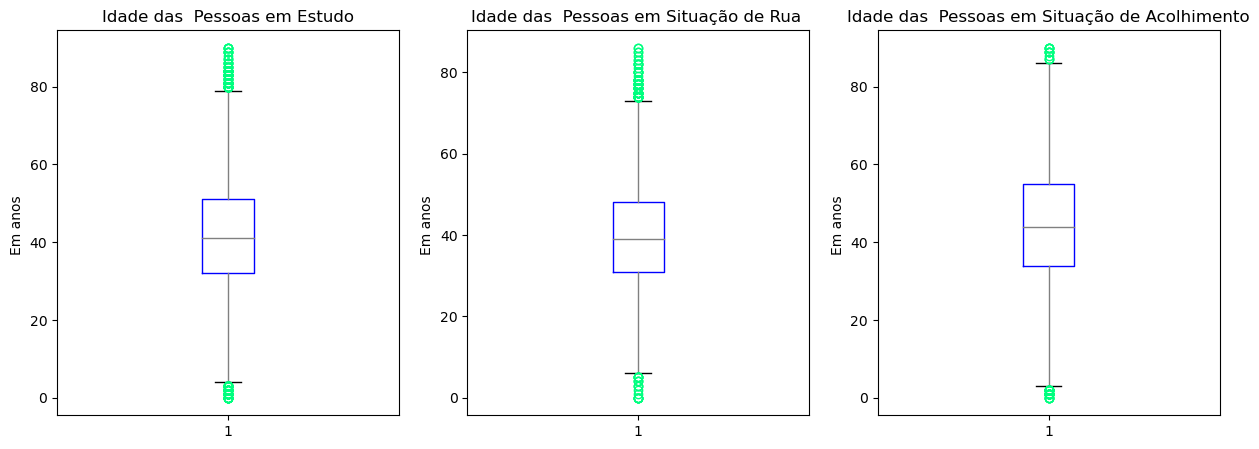

In [225]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_hist.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Estudo')
plt.ylabel('Em anos ')

plt.subplot(132)
plt.boxplot(df_hist_rua.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Situação de Rua ')
plt.ylabel('Em anos ')

plt.subplot(133)
plt.boxplot(df_hist_acolhidos.Idade,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Idade das  Pessoas em Situação de Acolhimento')
plt.ylabel('Em anos ')

#### Analisando a Distribuição das Idades pelo Gráfico de Histograma

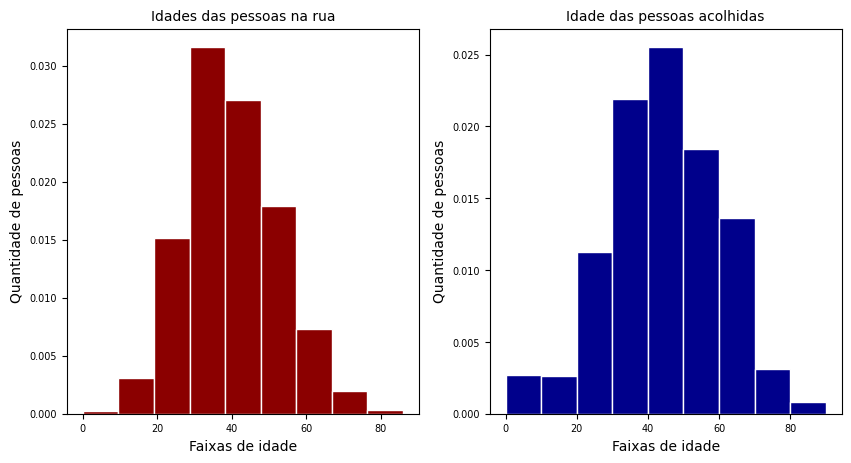

In [226]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_hist_rua['Idade'], edgecolor='white' , bins=len(ordem_faixa)-1 , color='darkred' , density = True)
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Idades das pessoas na rua', fontsize=10)

plt.subplot(122)

plt.hist(df_hist_acolhidos['Idade'], edgecolor='white' , bins=len(ordem_faixa)-1  , color='darkblue' , density=True )
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('Idade das pessoas acolhidas', fontsize=10)
plt.show()

### Encerrando a Análise Acerca das idades, vamos observar o parâmetro 'Classificação de Idade'

In [227]:
df['Classificação de idade'].value_counts().to_frame()

,Classificação de idade
Adulto,14645
Juventude,4086
Idoso,2672
Criança,375
Adolescente,301
Sem classificação,0


In [228]:
#Estabelecendo os filtros para separar os dataframes de rua e Acolhidos 
filtro_rua = df['Situação de rua'] == 'Rua'
filtro_acolhidos = df['Situação de rua'] == 'Acolhido'

df_rua = df.loc[filtro_rua , :]
df_acolhidos = df.loc[filtro_acolhidos , :]



### Estabelecendo as  tabelas de Crosstab

In [229]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize=True  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso,All
Situação de rua,,,,,,
Acolhido,1.562571,0.466507,7.033833,30.639975,8.460528,48.163413
Rua,0.135876,0.896780,11.472440,35.690022,3.641469,51.836587
All,1.698446,1.363286,18.506273,66.329997,12.101997,100.000000


In [230]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize='columns'  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso,All
Situação de rua,,,,,,
Acolhido,92.0,34.219269,38.007832,46.19324,69.91018,48.163413
Rua,8.0,65.780731,61.992168,53.80676,30.08982,51.836587


In [231]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize='index'  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso
Situação de rua,,,,,
Acolhido,3.244311,0.968591,14.604100,63.616701,17.566297
Rua,0.262123,1.730013,22.131935,68.851027,7.024902
All,1.698446,1.363286,18.506273,66.329997,12.101997


### 2.2 Realizando uma Análise pautada nas Formas de Identificação

#### Análise das Pessoas de acordo com a identificação pela Raça 

In [232]:
tabela_cruzada = pd.crosstab(df['Situação de rua'], df['Cor_Raça_Etnia'] , normalize ='index') #montagem da tabela cruzada
tabela_cruzada

Cor_Raça_Etnia,Amarela,Branca,Indígena,Não respondeu,Parda,Preta,Sem identificação
Situação de rua,,,,,,,
Acolhido,0.007968,0.248047,0.008442,0.007258,0.399448,0.184221,0.144615
Rua,0.004425,0.146494,0.004113,0.015774,0.302098,0.163621,0.363475


###### Analisando a quantidade de pessoas em situação de rua

In [233]:
df_situacao_rua = df.loc[(df['Situação de rua'] == 'Rua')] #filtro de pessoas em situação de rua
df_situacao_rua['Cor_Raça_Etnia'].value_counts(normalize = True ).to_frame()

,Cor_Raça_Etnia
Sem identificação,0.363475
Parda,0.302098
Preta,0.163621
Branca,0.146494
Não respondeu,0.015774
Amarela,0.004425
Indígena,0.004113


###### Analisando a quantidade de pessoas que estão em Centros de Acolhimento 

In [234]:
df_situacao_acolhimento = df.loc[(df['Situação de rua'] == 'Acolhido')] #filtro de pessoas que se encontram em abrigos
df_situacao_acolhimento['Cor_Raça_Etnia'].value_counts( normalize = True ).to_frame()

,Cor_Raça_Etnia
Parda,0.399448
Branca,0.248047
Preta,0.184221
Sem identificação,0.144615
Indígena,0.008442
Amarela,0.007968
Não respondeu,0.007258


###### Gráfico de pessoas em situação de rua e em acolhimento relacionadas à raça

Text(0.5, 1.0, 'Distribuição de raças das pessoas em situação de rua')

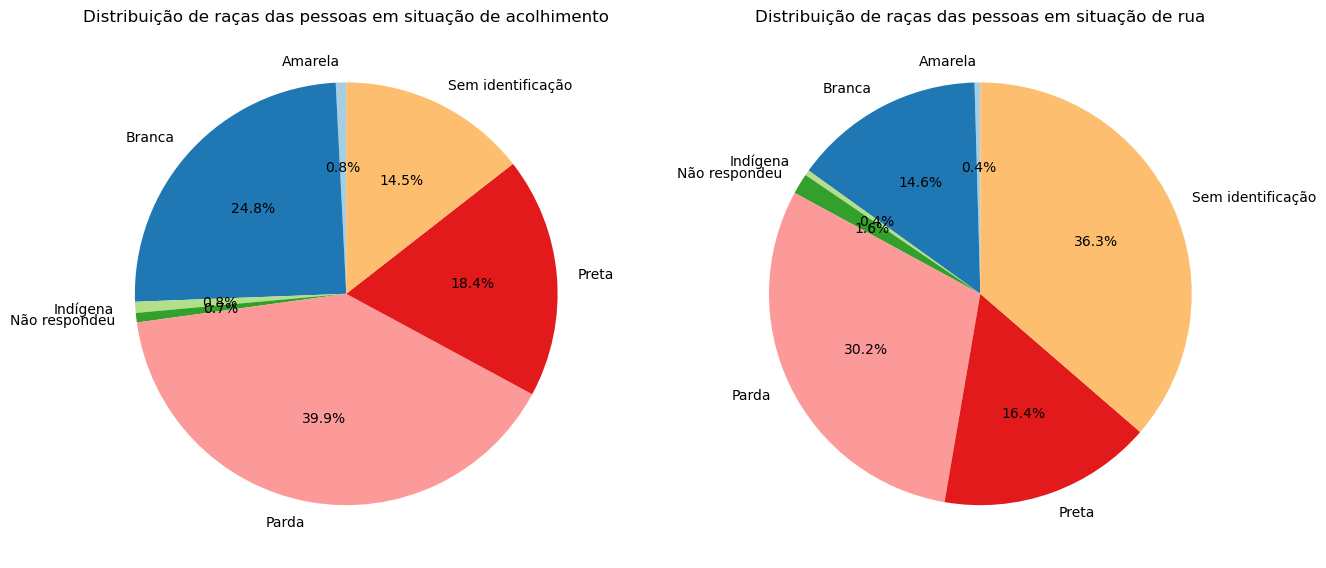

In [235]:
plt.figure(figsize=(15, 15))
plt.subplot(121)

#definindo as variaveis que serão utilizadas 
valores_acolhidos = tabela_cruzada.loc['Acolhido'].values
rotulos = tabela_cruzada.columns.tolist()

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_acolhidos, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de acolhimento')

# Criando um gráfico de pizza que relaciona a quantidade de moradores em situação de Acolhimento e raças
plt.subplot(122)

#definindo as variaveis que serão utilizadas 
valores_rua = tabela_cruzada.loc['Rua'].values

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_rua, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de rua')

#### Trabalhando com a mesma análise, mas em Dataframes sem o 'Não Respondeu'

In [236]:
filtro_n_respondeu = df['Cor_Raça_Etnia'] != 'Não respondeu'
df_plotagem = df.loc[filtro_n_respondeu , :]

tabela_cruzada = pd.crosstab(df_plotagem['Situação de rua'] , df_plotagem['Cor_Raça_Etnia'] , normalize='index')
tabela_cruzada


Cor_Raça_Etnia,Amarela,Branca,Indígena,Parda,Preta,Sem identificação
Situação de rua,,,,,,
Acolhido,0.008027,0.249861,0.008504,0.402368,0.185568,0.145673
Rua,0.004496,0.148842,0.004179,0.306940,0.166244,0.369301


Text(0.5, 1.0, 'Distribuição de raças das pessoas em situação de rua')

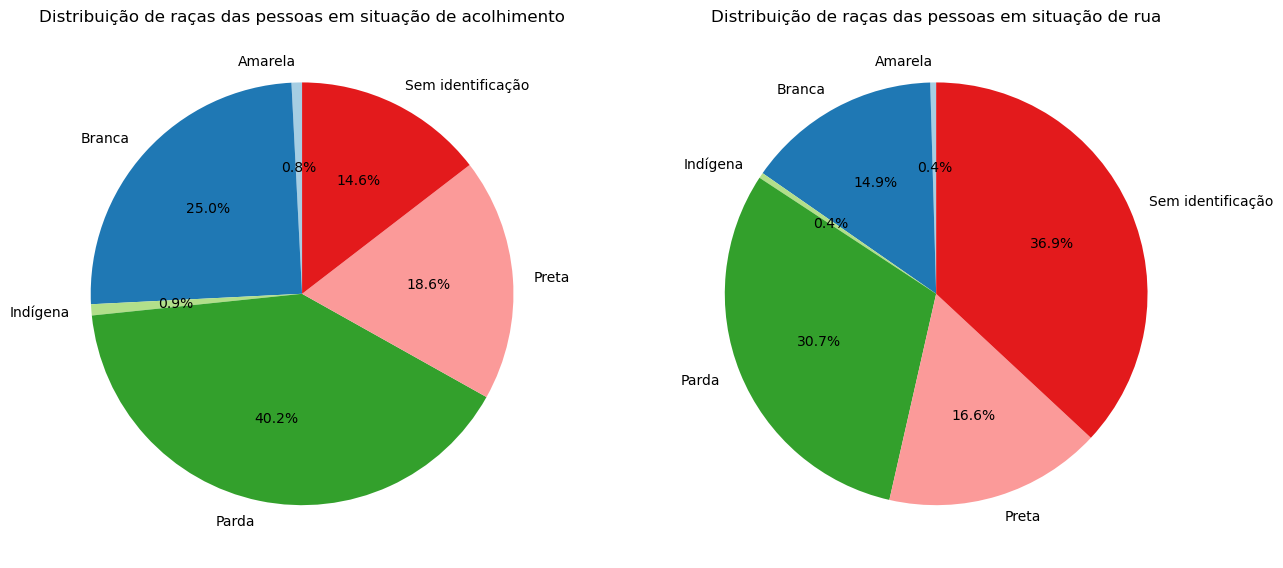

In [237]:
#Gráficos 
plt.figure(figsize=(15, 10))
plt.subplot(121)

#definindo as variaveis que serão utilizadas 
valores_acolhidos = tabela_cruzada.loc['Acolhido'].values
rotulos = tabela_cruzada.columns.tolist()

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_acolhidos, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de acolhimento')

# Criando um gráfico de pizza que relaciona a quantidade de moradores em situação de Acolhimento e raças
plt.subplot(122)

#definindo as variaveis que serão utilizadas 
valores_rua = tabela_cruzada.loc['Rua'].values

# Criando um gráfico de pizza
cores = plt.cm.Paired(range(len(rotulos)))  # Escolhendo cores com base no número de rótulos
plt.pie(valores_rua, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de rua')